In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
import operator

# Data Analysis and Visualization

In [2]:
# Reading data and storing in a dataframe
df = pd.read_csv("swpg.csv")
print(df.head())

       ftsw      lfgr
0  0.000000  0.042851
1  0.033333  0.064808
2  0.066667  0.222478
3  0.100000  0.419411
4  0.133333  0.500414


In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.describe()

,ftsw,lfgr
count,20.000000,20.000000
mean,0.400000,0.805269
std,0.311257,0.352534
min,0.000000,0.042851
25%,0.158333,0.713950
50%,0.300000,0.957184
75%,0.630556,1.034758
max,1.000000,1.138678


In [5]:
x = df['ftsw'] # Feature
y = df['lfgr'] # Label

In [6]:
print('Features', x.head())
print('Labels', y.head())

Features 0    0.000000
1    0.033333
2    0.066667
3    0.100000
4    0.133333
Name: ftsw, dtype: float64
Labels 0    0.042851
1    0.064808
2    0.222478
3    0.419411
4    0.500414
Name: lfgr, dtype: float64


In [7]:
x.count()

20

In [8]:
y.count()

20

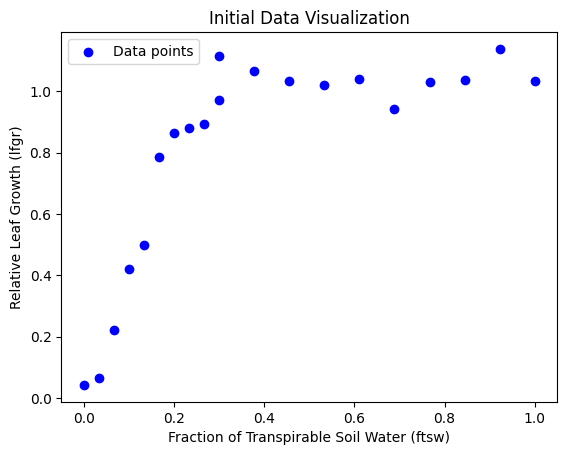

In [9]:
# Visualizing the relationship
plt.scatter(x, y, color='blue', label='Data points')
plt.xlabel('Fraction of Transpirable Soil Water (ftsw)')
plt.ylabel('Relative Leaf Growth (lfgr)')
plt.title('Initial Data Visualization')
plt.legend()
plt.show()

The dataset has 20 values in each column. 

The data has been broken down into 80-20 split with 16 values in the train set and 4 values in the test set. 

The train set will be used to train the models and the test set will be used for prediction.

# Task 1 - Models Training

Reshaping the data into arrays for linear model to accept them as input

In [10]:
X = x.values.reshape(-1, 1)
X

array([[0.        ],
       [0.03333333],
       [0.06666667],
       [0.1       ],
       [0.13333333],
       [0.16666667],
       [0.2       ],
       [0.23333333],
       [0.26666667],
       [0.3       ],
       [0.3       ],
       [0.37777778],
       [0.45555556],
       [0.53333333],
       [0.61111111],
       [0.68888889],
       [0.76666667],
       [0.84444444],
       [0.92222222],
       [1.        ]])

In [11]:
y = y.values
y

array([0.04285091, 0.06480777, 0.22247844, 0.41941089, 0.50041365,
       0.78512908, 0.8648735 , 0.88138699, 0.89223973, 0.97049858,
       1.11515472, 1.0673055 , 1.03353086, 1.02122416, 1.03928595,
       0.94386923, 1.03036027, 1.03843743, 1.13867789, 1.03345079])

In [12]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
print(f"Training data count: {len(X_train)}")
print(f"Testing data count: {len(X_test)}")

Training data count: 16
Testing data count: 4


## Linear Regression Model

Initializing the linear regression model

In [14]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [15]:
print("Linear Model Coefficients:", linear_model.coef_)
print("Linear Model Intercept:", linear_model.intercept_)

Linear Model Coefficients: [0.62324621]
Linear Model Intercept: 0.6253668990351853


## Polynomial Regression Models

### Degree 3

In [16]:
k = 3 # Polynomial degree
poly_deg_3 = PolynomialFeatures(degree=k)
X_poly_train_3 = poly_deg_3.fit_transform(X_train)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_poly_train_3, y_train)

LinearRegression()

### Degree 9

In [17]:
l = 9 # Polynomial degree
poly_deg_9 = PolynomialFeatures(degree=l)
X_poly_train_9 = poly_deg_9.fit_transform(X_train)
poly_model_9 = LinearRegression()
poly_model_9.fit(X_poly_train_9, y_train)

LinearRegression()

# Task 2 - Evaluation

### Methods
Methods used:
	• Mean Squared Error (MSE)
	• R-Squared
    Cross Validation

The technique used was predicting (test set) which was not seen by the model before. This method is imperative to understand how the model will perform in real world scenarios or new data. This method will also demonstrate the generalization and predictive ability of the models.

Each model uses a different transformation of the input to demonstrate the performance of the model with increasing complexity 

Cross-validation and metric evaluation on the test set




In [18]:
# Predictions using the linear regression model
y_pred_linear = linear_model.predict(X_test)

In [19]:
# Predictions using the polynomial regression model of degree 3
X_poly_test_3 = poly_deg_3.transform(X_test)
y_pred_poly_3 = poly_model_3.predict(X_poly_test_3)

In [20]:
# Predictions using the polynomial regression model of degree 9
X_poly_test_9 = poly_deg_9.transform(X_test)
y_pred_poly_9 = poly_model_9.predict(X_poly_test_9)

#### Cross-validation

Splitting the data into 5 folds. Each fold, in cross-validation, is used as a validation set. The process repeats 'k' times and then the results are averaged to provide a more reliable evaluation of the performance. 

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [22]:
# Cross-validation scores
linear_scores_mse = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
linear_scores_r2 = cross_val_score(linear_model, X_train, y_train, cv=kf, scoring='r2')

In [23]:
poly_model_3_pipeline = make_pipeline(PolynomialFeatures(degree=3), LinearRegression())
poly3_scores_mse = cross_val_score(poly_model_3_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
poly3_scores_r2 = cross_val_score(poly_model_3_pipeline, X_train, y_train, cv=kf, scoring='r2')

In [24]:
poly_model_9_pipeline = make_pipeline(PolynomialFeatures(degree=9), LinearRegression())
poly9_scores_mse = cross_val_score(poly_model_9_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
poly9_scores_r2 = cross_val_score(poly_model_9_pipeline, X_train, y_train, cv=kf, scoring='r2')

In [25]:
# Calculate average scores
linear_mse = -np.mean(linear_scores_mse)
linear_r2 = np.mean(linear_scores_r2)

In [26]:
poly3_mse = -np.mean(poly3_scores_mse)
poly3_r2 = np.mean(poly3_scores_r2)

In [27]:
poly9_mse = -np.mean(poly9_scores_mse)
poly9_r2 = np.mean(poly9_scores_r2)

#### MSE and R^2

In [28]:
# Print results
print("Linear Regression Cross-Validation MSE:", linear_mse)
print("Linear Regression Cross-Validation R²:", linear_r2)

print("Polynomial Degree 3 Cross-Validation MSE:", poly3_mse)
print("Polynomial Degree 3 Cross-Validation R²:", poly3_r2)

print("Polynomial Degree 9 Cross-Validation MSE:", poly9_mse)
print("Polynomial Degree 9 Cross-Validation R²:", poly9_r2)

Linear Regression Cross-Validation MSE: 0.0614420112912487
Linear Regression Cross-Validation R²: -4.588757970654823
Polynomial Degree 3 Cross-Validation MSE: 0.014463348508625583
Polynomial Degree 3 Cross-Validation R²: -0.5292629452381935
Polynomial Degree 9 Cross-Validation MSE: 157.77258759011903
Polynomial Degree 9 Cross-Validation R²: -18326.45185210372


The negative R^2 value indicates that the linear model is performing worse than a horizontal line with poor generalization. 

For Polynomial Degree 3, MSE is lower than linear, indicating better fit. 

Extremely high MSE and low R^2 for degree 9 polynomial indicate severe overfitting. 


### Metrics


In [33]:
# Evaluation Metrics
print("Linear Regression MSE:", mean_squared_error(y_test, y_pred_linear))
print("Linear Regression R²:", r2_score(y_test, y_pred_linear))
print("Polynomial Degree 3 MSE:", mean_squared_error(y_test, y_pred_poly_3))
print("Polynomial Degree 3 R²:", r2_score(y_test, y_pred_poly_3))
print("Polynomial Degree 9 MSE:", mean_squared_error(y_test, y_pred_poly_9))
print("Polynomial Degree 9 R²:", r2_score(y_test, y_pred_poly_9))

Linear Regression MSE: 0.17559523007375488
Linear Regression R²: 0.20481178026944724
Polynomial Degree 3 MSE: 0.008510368740849551
Polynomial Degree 3 R²: 0.9614605421488714
Polynomial Degree 9 MSE: 0.3424265445774193
Polynomial Degree 9 R²: -0.5506887872559632


#### Mean Squared Error (MSE)
Mean Squared Error is a measure of the average squared difference between the actual observed values and the values predicted by the model.

Interpretation and Explanation: A lower MSE value indicates that the predictions are closer to the actual values, hence, reflecting better model performance. It is particularly useful for comparing different models. The model with the smallest MSE is considered the best in terms of predictive accuracy.

Application: The degree 3 polynomial model had the lowest MSE, indicating the highest accuracy, while the degree 9 model had the highest MSE, indicating overfitting.

####  R-squared R^2
R-squared is a statistical metric indicating the portion of the variance in the dependent variable that can be anticipated from the independent variable or variables.

Interpretation: R^2 values range from 0 to 1, with higher values indicating better explanatory power of the model. An R^2 value of 1 implies that the model explains all the variance in the response variable, while an R^2 value of 0 implies that the model explains none of the variance. Negative R^2 values can occur if the model fits the data worse than a horizontal line (the mean of the actual values).

Application: The degree 3 polynomial model achieved the highest R^2 value, close to 1, demonstrating its superior ability to capture the variance in the data.
The linear model had a low R^2, indicating poor fit, and the degree 9 model had a negative R^2, further confirming it was overfitting and performing worse than a simple mean-based prediction.

The above plots visualize the actual vs. predicted values for each model. 

Linear Model: It did not capture the nonlinear trend well.

Degree 3 polynomial model: It provided an excellent fit to the data and captured the underlying pattern effectively.

Degree 9 polynomial model: It overfitted, as indicated by its poor performance on the test set and its overly complex curve that follows the noise in the training data rather than the underlying trend.

#### Cross-validation
Cross-validation entails dividing the dataset into several subsets, known as folds, wherein the model is trained on some of these folds and validated on the rest. This process is repeated multiple times to ensure that each subset serves as the validation set once, providing a more reliable measure of model performance. It helps in assessing how well the model generalizes to unseen data by averaging the results over different data splits.

### Results

#### Linear Regression

MSE value of 0.1756 indicated a moderate error between the predicted and actual values.

R²: 0.2048 indicated that only about 20% of the variance in the dependent variable is predictable from the feature, indicating a weak predictive power.

#### Polynomial Regression Degree 3

MSE of 0.0085, which is significantly lower than that of the linear model, indicated much higher accuracy in predictions.

R² of 0.9615 indicated a very high level of predictability, with the model explaining 96% of the variance in the dependent variable.

#### Polynomial Regression Degree 9

MSE of 0.3424 which is higher than both the linear and degree 3 polynomial models, indicated poor predictions with substantial errors.

R² of -0.5507, which is negative, indicated that the model performs worse than a horizontal line fit to the data. This is a classic sign of model overfitting, where the model fitted the training data too closely and failed to generalize to new, unseen data.

# Task 3 - Performance

## Linear Regression - Underfitting
Performance Metrics: The Mean Squared Error (MSE) was relatively high at 0.1756, and the R² value was low at 0.2048.

Interpretation: This indicates that the linear model has a poor fit to the data, capturing only about 20% of the variance. This is a typical sign of underfitting, where the model is too simple to capture the complex patterns in the data.

## Polynomial Regression Degree 3 - Best Model
Performance Metrics: This model achieved an excellent MSE of 0.0085 and an R² of 0.9615.

Interpretation: These metrics suggest that the model provides a very good fit to the data, capturing 96% of the variance. The model appears to be well-suited for the data, striking a good balance between bias and variance, and is neither significantly overfitting nor underfitting. It is generalizing the data well and has robust predictive power. 

## Polynomial Regression Degree 9 - Overfitting
Performance Metrics: The MSE soared to 0.3424 with a negative R² of -0.5507.

Interpretation: The negative R² indicates that the model performs worse than a simple horizontal line fit to the data points. This is a clear indication of overfitting, where the model is too complex, fitting the noise in the training data rather than the underlying data pattern. Overfit models often perform poorly on unseen data, as reflected by the metrics

## Conclusion
The above analysis highlighted the importance of choosing the right model that was neither overfitting nor underfitting. The degree 3 polynomial model emerged as the most effective and provided robust predictive performance.

# Task 4 - Plots

## Residual Plots

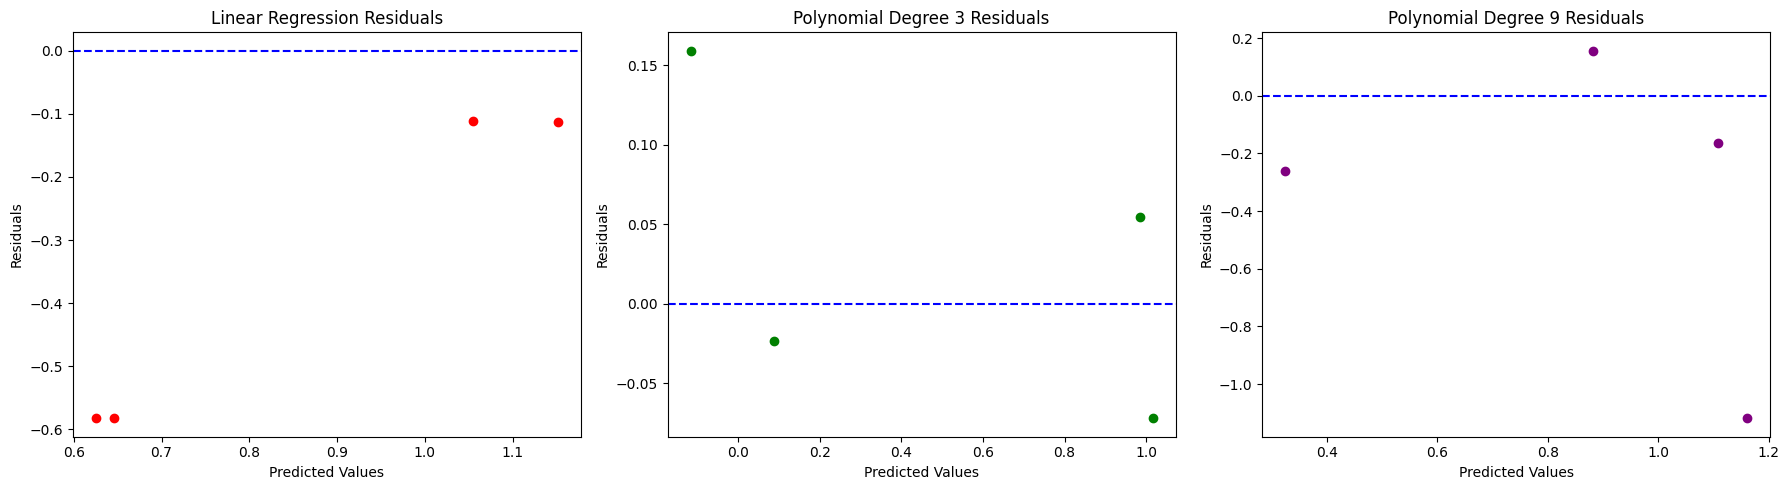

In [34]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
residuals_linear = y_test - y_pred_linear
plt.scatter(y_pred_linear, residuals_linear, color='red')
plt.axhline(0, color='blue', linestyle='--') # Horizontal line
plt.title('Linear Regression Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 2)
residuals_poly_3 = y_test - y_pred_poly_3
plt.scatter(y_pred_poly_3, residuals_poly_3, color='green')
plt.axhline(0, color='blue', linestyle='--')
plt.title('Polynomial Degree 3 Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.subplot(1, 3, 3)
residuals_poly_9 = y_test - y_pred_poly_9
plt.scatter(y_pred_poly_9, residuals_poly_9, color='purple')
plt.axhline(0, color='blue', linestyle='--')
plt.title('Polynomial Degree 9 Residuals')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

The residuals for the data points in Polynomial Degree 3 (middle plot) were closest to the zero line. This demonstrated accurate predictions and unbias.

## Scatter Plots

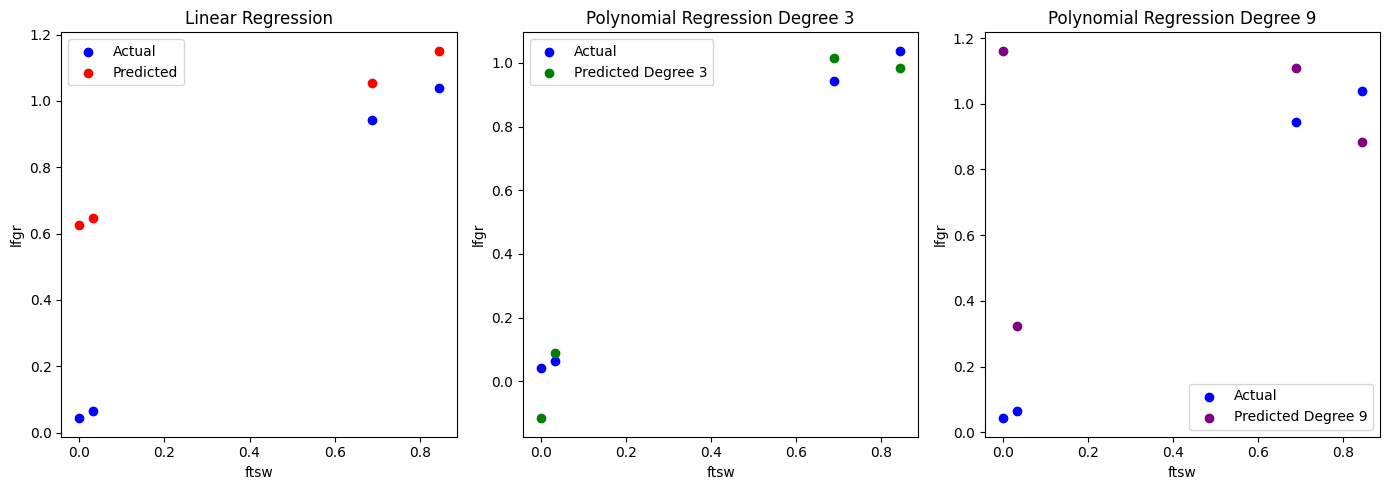

In [35]:
# Scatter Plots
plt.figure(figsize=(14, 5))
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_linear, color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly_3, color='green', label='Predicted Degree 3')
plt.title('Polynomial Regression Degree 3')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_poly_9, color='purple', label='Predicted Degree 9')
plt.title('Polynomial Regression Degree 9')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

plt.tight_layout()
plt.show()

In the plots above:
Linear Regression had a huge gap between actual and prediction in the lower ftsw values.

Polynomial Regression Degree 3 had excellent prediction as demonstrarted in the plot by the closesness of actual and predicted values.

Polynomial Regression Degree 9 performed really poor as seen by the long distance of actual and predicted values.

## Linear Fit and Polynomial Fit Plots

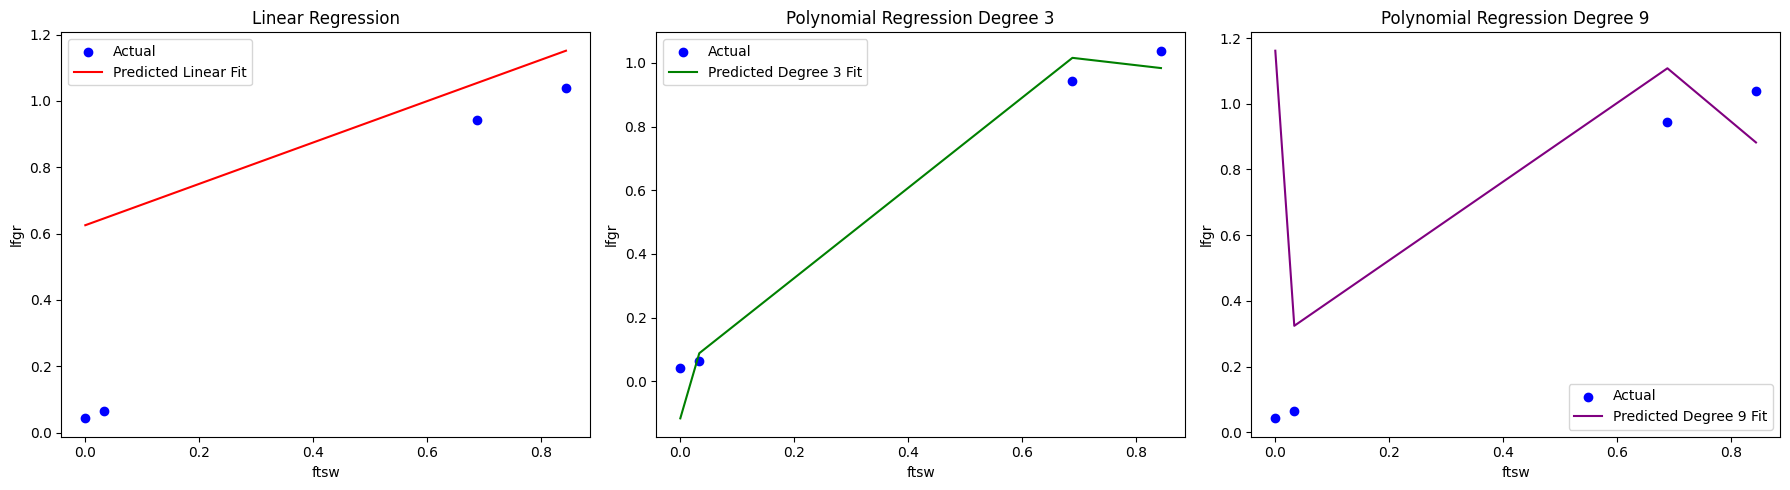

In [36]:
# Sorting values for plotting
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(X_test, y_pred_linear), key=sort_axis)
X_test_sorted, y_pred_linear_sorted = zip(*sorted_zip)

sorted_zip_poly3 = sorted(zip(X_test, y_pred_poly_3), key=sort_axis)
X_test_sorted_poly3, y_pred_poly_3_sorted = zip(*sorted_zip_poly3)

sorted_zip_poly9 = sorted(zip(X_test, y_pred_poly_9), key=sort_axis)
X_test_sorted_poly9, y_pred_poly_9_sorted = zip(*sorted_zip_poly9)

# Visualization of the results
plt.figure(figsize=(18, 5))

# Linear Regression Plot
plt.subplot(1, 3, 1)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test_sorted, y_pred_linear_sorted, color='red', label='Predicted Linear Fit')
plt.title('Linear Regression')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

# Polynomial Regression Degree 3 Plot
plt.subplot(1, 3, 2)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test_sorted_poly3, y_pred_poly_3_sorted, color='green', label='Predicted Degree 3 Fit')
plt.title('Polynomial Regression Degree 3')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

# Polynomial Regression Degree 9 Plot
plt.subplot(1, 3, 3)
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test_sorted_poly9, y_pred_poly_9_sorted, color='purple', label='Predicted Degree 9 Fit')
plt.title('Polynomial Regression Degree 9')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

plt.tight_layout()
plt.show()

In the plot above:
Linear Regression: The model failed to capture non-linear relationship as indicated by the linear fit.

Polynomial Regression Degree 3: The predicted line was curved that was closely fitting the actual data points. It indicated predictions that closely matched the actual values. It generalized the data well. 

Polynomial Regression Degree 9: It demonstrated a highly flexible curve. It indicated that the model is capturing noise and is overfitting. 

## Comparison of Regression Models with Line Plots

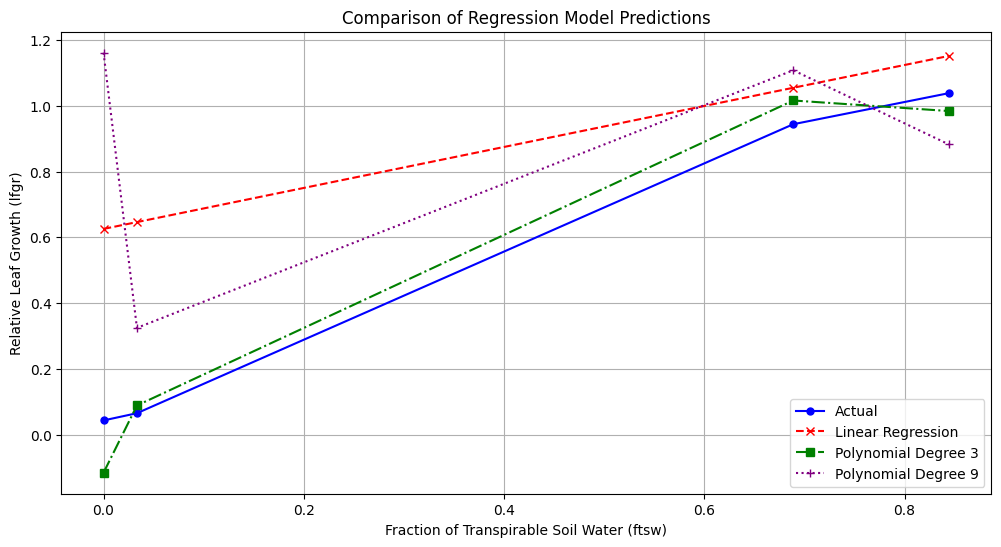

In [37]:
# Sorting the data for plotting
indices = X_test.argsort(axis=0).flatten()
X_test_sorted = X_test[indices]
y_test_sorted = y_test[indices]
y_pred_linear_sorted = y_pred_linear[indices]
y_pred_poly_3_sorted = y_pred_poly_3[indices]
y_pred_poly_9_sorted = y_pred_poly_9[indices]

# Plotting Comparison of Regression Models with Line Plots
plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted, y_test_sorted, label='Actual', color='blue', marker='o', linestyle='-', markersize=5)
plt.plot(X_test_sorted, y_pred_linear_sorted, label='Linear Regression', color='red', marker='x', linestyle='--')
plt.plot(X_test_sorted, y_pred_poly_3_sorted, label='Polynomial Degree 3', color='green', marker='s', linestyle='-.')
plt.plot(X_test_sorted, y_pred_poly_9_sorted, label='Polynomial Degree 9', color='purple', marker='+', linestyle=':')
plt.title('Comparison of Regression Model Predictions')
plt.xlabel('Fraction of Transpirable Soil Water (ftsw)')
plt.ylabel('Relative Leaf Growth (lfgr)')
plt.legend()
plt.grid(True)
plt.show()

In the above plot, the Polynomial Degree 3 was the closest to the actual line that indicated it is the best model amongst all. 

## Commulative Error Plot

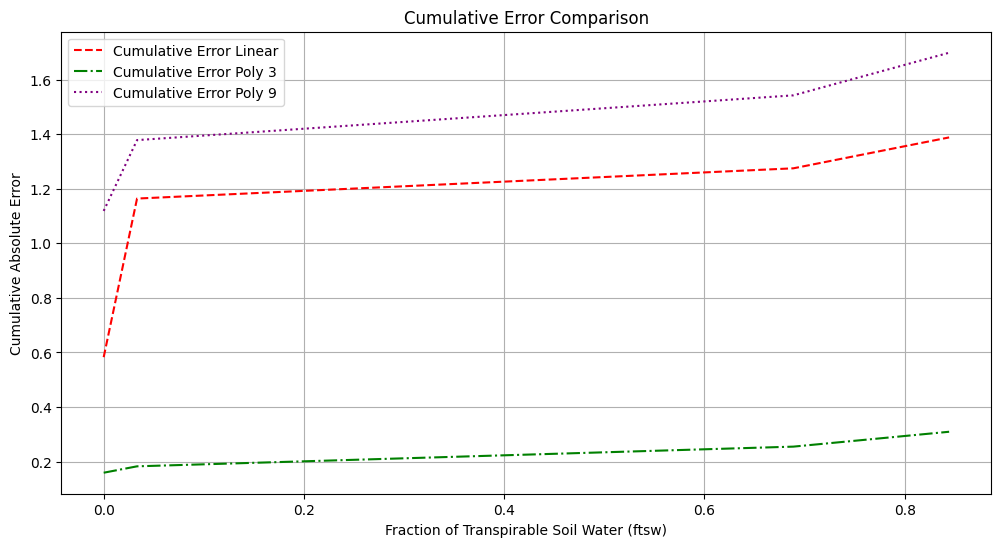

In [38]:
# Cumulative Error Plot
## Reference: https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html
cumulative_error_linear = np.cumsum(np.abs(y_test_sorted - y_pred_linear_sorted))
cumulative_error_poly_3 = np.cumsum(np.abs(y_test_sorted - y_pred_poly_3_sorted))
cumulative_error_poly_9 = np.cumsum(np.abs(y_test_sorted - y_pred_poly_9_sorted))

plt.figure(figsize=(12, 6))
plt.plot(X_test_sorted, cumulative_error_linear, label='Cumulative Error Linear', color='red', linestyle='--')
plt.plot(X_test_sorted, cumulative_error_poly_3, label='Cumulative Error Poly 3', color='green', linestyle='-.')
plt.plot(X_test_sorted, cumulative_error_poly_9, label='Cumulative Error Poly 9', color='purple', linestyle=':')
plt.title('Cumulative Error Comparison')
plt.xlabel('Fraction of Transpirable Soil Water (ftsw)')
plt.ylabel('Cumulative Absolute Error')
plt.legend()
plt.grid(True)
plt.show()

The above plot demonstrated that the degree 3 polynomial regression model had the lowest cumulative absolute error across the entire range of ftsw. This indicated that this model provided the most accurate predictions with the smallest overall error, making it the best model amongst the three.

## Cross-validation Plot

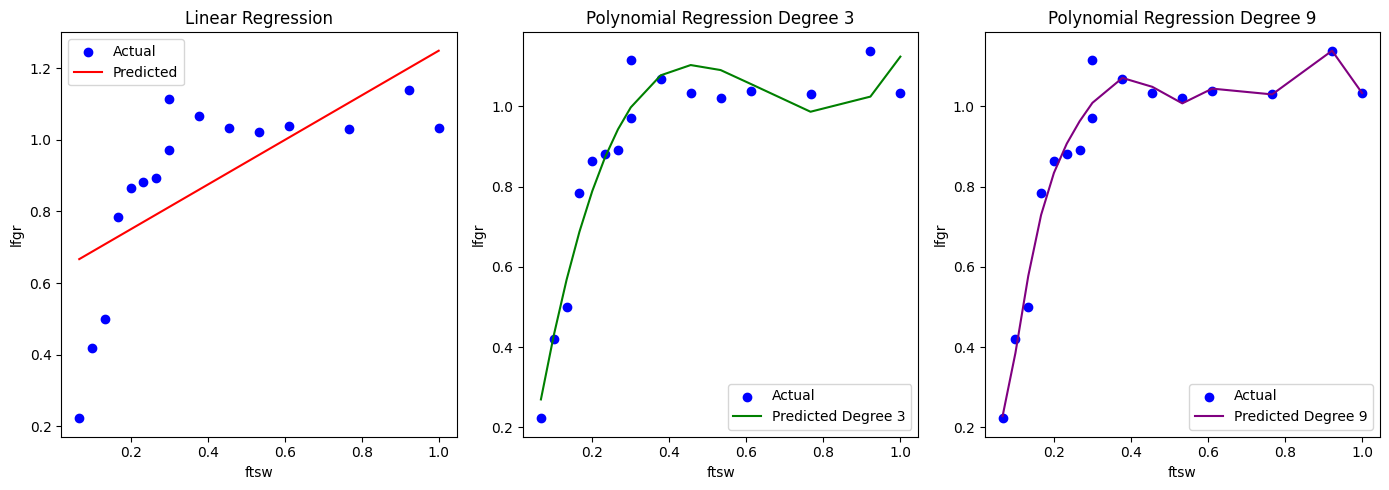

In [39]:
# Visualizing the results
plt.figure(figsize=(14, 5))

plt.subplot(1, 3, 1)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(np.sort(X_train, axis=0), linear_model.predict(np.sort(X_train, axis=0)), color='red', label='Predicted')
plt.title('Linear Regression')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(np.sort(X_train, axis=0), poly_model_3.predict(poly_deg_3.transform(np.sort(X_train, axis=0))), color='green', label='Predicted Degree 3')
plt.title('Polynomial Regression Degree 3')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(np.sort(X_train, axis=0), poly_model_9.predict(poly_deg_9.transform(np.sort(X_train, axis=0))), color='purple', label='Predicted Degree 9')
plt.title('Polynomial Regression Degree 9')
plt.xlabel('ftsw')
plt.ylabel('lfgr')
plt.legend()

plt.tight_layout()
plt.show()

The above plots demonstrate how well the model is performing on the training set

The linear model predicts a straight line indicating its failure to capture non-linear patterns.

The Polynomial Degree 3 performs much better and is capturing non linear patterns and is generalizing well. 


## MSE and R^2 Comparison 

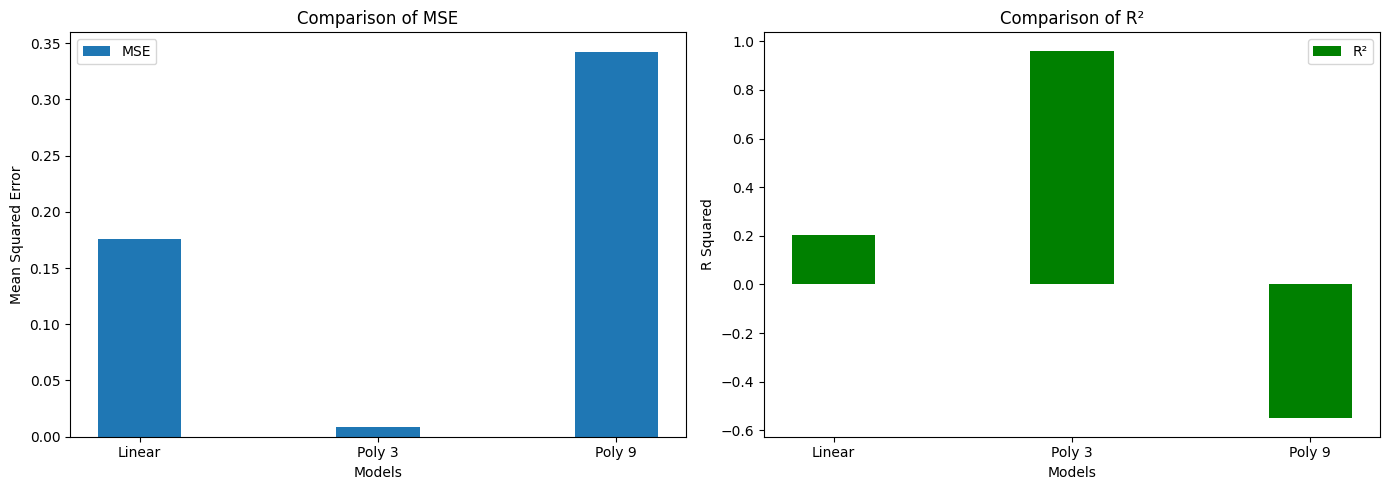

In [40]:
mse_values = [mean_squared_error(y_test, y_pred_linear), mean_squared_error(y_test, y_pred_poly_3), mean_squared_error(y_test, y_pred_poly_9)]
r_squared_values = [r2_score(y_test, y_pred_linear), r2_score(y_test, y_pred_poly_3), r2_score(y_test, y_pred_poly_9)]

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
bar_width = 0.35
index = np.arange(3)
labels = ['Linear', 'Poly 3', 'Poly 9']

ax[0].bar(index, mse_values, bar_width, label='MSE')
ax[0].set_xlabel('Models')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Comparison of MSE')
ax[0].set_xticks(index)
ax[0].set_xticklabels(labels)
ax[0].legend()

ax[1].bar(index, r_squared_values, bar_width, color='green', label='R²')
ax[1].set_xlabel('Models')
ax[1].set_ylabel('R Squared')
ax[1].set_title('Comparison of R²')
ax[1].set_xticks(index)
ax[1].set_xticklabels(labels)
ax[1].legend()

plt.tight_layout()
plt.show()

Comparison of MSE: 
The bar plot demonstrated that the degree 3 polynomial model had the lowest Mean Squared Error (MSE) which indicated the highest prediction accuracy.

Comparison of R^2:
The degree 3 polynomial model had the highest R² value, close to 1 which indicated that it explained most of the variance in the data.